# Loading Data

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
DATA_SRC = './masterdata.csv'
df = pd.read_csv(DATA_SRC)

df.sort_values('MatchID', inplace = True)
df.head()

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,...,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
373,5567,Arsenal,Aston Villa,1,1,72.9,27.1,7,3,24,...,0,2007,17.10,18,14.85,21,28.16,17,2.08,18
379,5568,Bolton,Spurs,2,0,37.8,62.2,4,2,13,...,0,2007,19.38,16,4.39,16,69.54,23,44.06,23
374,5569,Everton,Watford,2,1,47.0,53.0,2,7,8,...,0,2007,20.41,11,2.85,16,11.97,29,15.39,23
375,5570,Newcastle,Wigan,2,1,55.3,44.7,5,4,8,...,0,2007,36.34,8,12.74,14,29.24,23,27.73,25
376,5571,Portsmouth,Blackburn,3,0,44.3,55.7,11,3,21,...,1,2007,10.37,28,1.43,32,18.84,21,19.28,25


데이터셋을 불러서 ```MatchID```, ```Home_team```, ```Away_team``` 등의 column을 drop한 DataFrame을 ```df_```에 저장  
필요시 함수를 만들어서 feature를 가공해 덧붙일 수 있음(ex. 유효 슈팅 / 슈팅)

In [5]:
df_ = df.drop(columns = ['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away', 'year', 'Expenditures_home', 'Arrivals_home', 'Income_home', 'Departures_home', 'Expenditures_away', 'Arrivals_away', 'Income_away', 'Departures_away'])
print(len(df_.columns))
list(df_)
#df_.hist()

24


['Possession_home',
 'Possession_away',
 'Shots_on_target_home',
 'Shots_on_target_away',
 'Shots_home',
 'Shots_away',
 'Touches_home',
 'Touches_away',
 'Passes_home',
 'Passes_away',
 'Tackles_home',
 'Tackles_away',
 'Clearances_home',
 'Clearances_away',
 'Corners_home',
 'Corners_away',
 'Offsides_home',
 'Offsides_away',
 'Yellow_cards_home',
 'Yellow_cards_away',
 'Fouls_conceded_home',
 'Fouls_conceded_away',
 'Red_cards_home',
 'Red_cards_away']

Correlation matrix를 보기 위해 seaborn을 import하고, home team과 away team의 features 간 correlation 출력  
사실 home team과 away team의 승률에 약간 차이가 나서 home/away에 따른 차이가 있을 줄 알고 그래프를 만들어 보았는데  
딱히 두드러지는 차이점은 없었음

['Possession_home',
 'Shots_on_target_home',
 'Shots_home',
 'Touches_home',
 'Passes_home',
 'Tackles_home',
 'Clearances_home',
 'Corners_home',
 'Offsides_home',
 'Yellow_cards_home',
 'Fouls_conceded_home',
 'Red_cards_home']

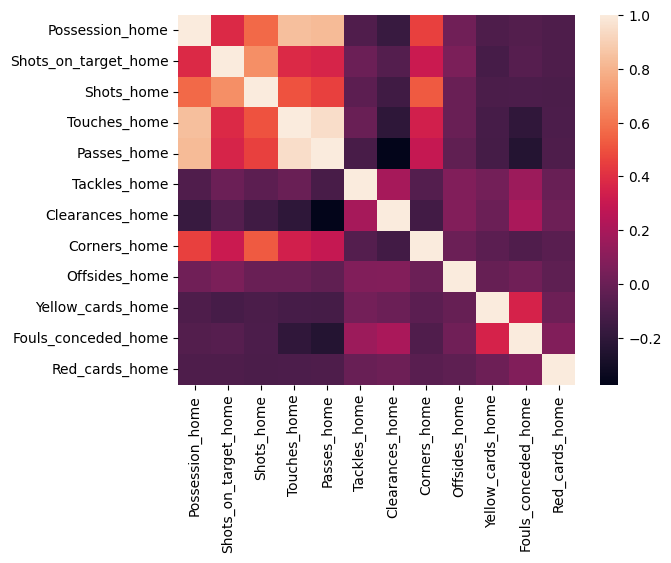

In [19]:
import seaborn as sbn

home_features = [f for f in list(df_) if 'home' in f]
home_corr_matrix = df_[home_features].corr()
df_home = df_[home_features]  #home team features를 담은 DataFrame 임시 생성

sbn.heatmap(home_corr_matrix)
list(df_home)

<AxesSubplot:>

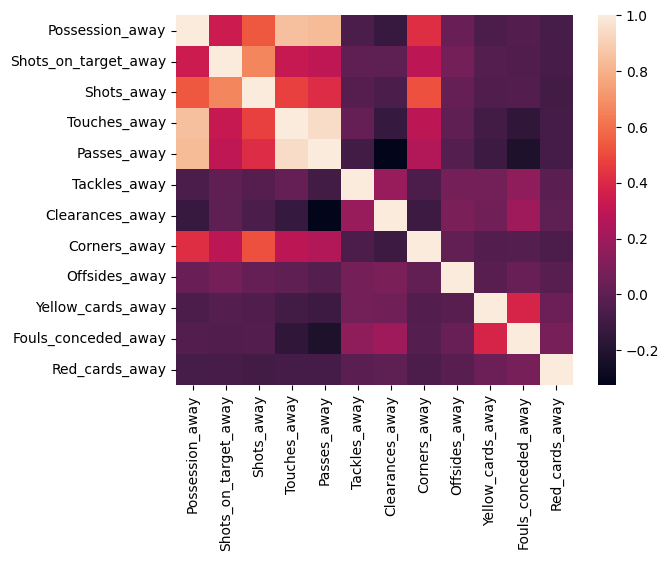

In [20]:
away_features = [f for f in list(df_) if 'away' in f]
away_corr_matrix = df_[away_features].corr()
df_away = df_[away_features] #임시 생성

sbn.heatmap(away_corr_matrix)

### Feature Engineering

In progress

## Modeling

우선 Logistic Regression과 Linear Regression Model을 import해서 deploy 해보았음

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold

### Linear Regression

In [22]:
X = df_.values
y = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [23]:
some_data = df_.iloc[:5]
some_labels = df['Score_home'][:5]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.63076309 1.58692138 1.5516484  1.78726888 3.88618221]
Labels:  [1, 2, 2, 2, 3]


In [24]:
goal_predictions = lin_reg.predict(df_.values)
lin_mse = mean_squared_error(y, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  1.0200298340195477


----

Home team만의 attribute로 예측했을 때는 RMSE가 더 큰 듯?

In [25]:
X = df_home.values
y = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

some_data = df_home.iloc[:5]
some_labels = df['Score_home'][:5]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.81041503 1.36274001 1.3967631  1.82945185 3.45218474]
Labels:  [1, 2, 2, 2, 3]


In [26]:
goal_predictions = lin_reg.predict(df_home.values)
lin_mse = mean_squared_error(y, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  1.0465083053196147


### Logistic Regression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [29]:
some_data = df_home.iloc[:5]
some_labels = df['Score_home'][:5]
print('Prediction: ', log_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [2 1 2 1 2]
Labels:  [1, 2, 2, 2, 3]


In [31]:
goal_predictions = log_reg.predict(df_home.values)
log_mse = mean_squared_error(y, goal_predictions)
log_rmse = np.sqrt(log_mse)
print('RMSE: ', log_rmse)

RMSE:  1.332875982433418


<AxesSubplot:>

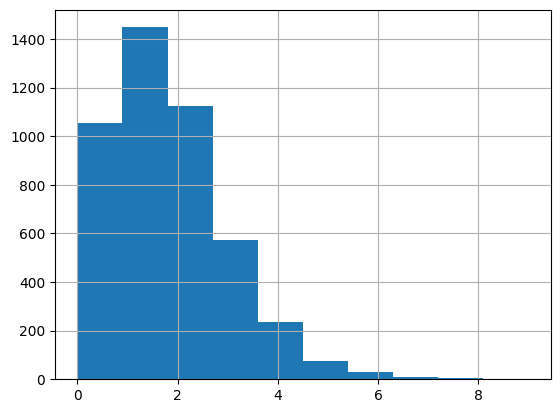

In [86]:
df['Score_home'].hist()

대부분의 경기에서 0~2의 득점을 기록하는 점을 감안하면 RMSE가 1에 근접하는 것은 좋지 않음.  
따라서 이것을 줄여 나가야 해요.